# HW 1
Submission: Upload your .ipynb file to Laulima. Before submission, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
## Exercise 1: Basic Python

Write a function that computes the first N elements of the Bibonacci Sequence. This sequence is defined as B[0]=1, B[1]=1, B[2]=1, and for k>2, B[k]=B[k-1]+B[k-2]+B[k-3]. The function should take N as an argument, and return a list of N ints. Print the first N=20 elements of the sequence.

Use list comprehensions to create a one-line python command that prints the first 20 counting numbers that are not in the list of 20 Bibonacci numbers computed above.

Write a Python program to create a dictionary grouping a sequence of key-value pairs into a dictionary of lists.

Original list:
[('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]

Grouping a sequence of key-value pairs into a dictionary of lists:
{'yellow': [1, 3], 'blue': [2, 4], 'red': [1]}

Write a Python class named Rectangle constructed by a length and width and a method print_area which will print the area of a rectangle, formatted with no more than two decimal places.

## Exercise 2: Numpy
This part uses common ML libraries. They are pre-installed in Colab, but if you are working on your own machine you will need to install them. 

Use conda to install packages! Conda will automatically install dependencies and make sure your packages work well together. For example, activate your environment from a terminal `conda activate myenv`, then `conda install numpy matplotlib pandas`. If conda says there are package conflicts, try installing from the conda-forge repository `conda install -c conda-forge matplotlib`.

You can also run terminal commands directly from Jupyter by starting a line with `!`. For example, `!conda install -y numpy pandas matplotlib`.

In [83]:
import numpy as np

Write a Numpy function that takes int N and returns an NxN numpy array filled with a checkerboard pattern.\
For example, for N=8, the function should return: \
[[0 1 0 1 0 1 0 1] \
.......... \
[0 1 0 1 0 1 0 1] \
[1 0 1 0 1 0 1 0]]

Write a numpy function Selector that takes in 2-dimensional array X, removes any row for which the sum of the row is not zero, and returns the resulting 2-D array. Use the numpy function `np.isclose()` to test whether the sum is zero, since floating point arithmetic can be imprecise.

In machine learning, a common way to describe the relationship between features is via a *covariance* matrix. Write a function that computes the sample covariance matrix of a dataset $X$, a 2-dimensional array of shape $N$-by-$D$. The sample covariance matrix $\Sigma$ is a $D$-by-$D$ matrix where element $\Sigma_{i,j}$ is the sample covariance of $X[:,i]$ and $X[:,j]$.

Use the following definition of sample covariance between features $$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$ where $N$ is the length of the vectors, and $\bar{x}$ is the mean of vector $x$. **Warning:** The sample covariance is an *estimate* of the *true* covariance of the random variables. There are other ways to estimate the variance from a finite dataset. Use this definition.

Verify your function works by computing the covariance on random data and making sure it matches `numpy.cov()`. In your function, you can use `np.mean()` and `np.dot()`, but don't use `np.cov()`.


## Exercise 3: Working with Data

In this exercise you will examine how Covid-19 outbreaks are corelated between states. The following code demonstrates how to download covid data for Hawaii.

Jupyter also includes a number 'magic' commands that do special tricks in notebooks. For example, `%matplotlib inline` makes plots appear in the notebook. These do not work yet in the xeus-python kernel, so if you are using JupyterLab3 you may have to switch kernels (top right in JupyterLab).

In [6]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

,date,positiveIncrease,hospitalizedCurrently,onVentilatorCurrently,deathIncrease
316,2020-03-04,0,0.0,0.0,0
315,2020-03-05,0,0.0,0.0,0
314,2020-03-06,0,0.0,0.0,0
313,2020-03-07,1,0.0,0.0,0
312,2020-03-08,0,0.0,0.0,0


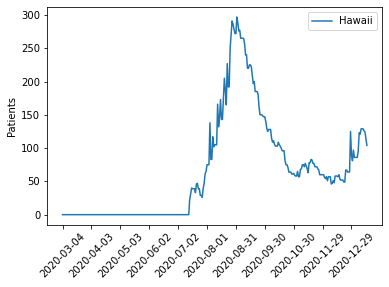

In [61]:
# Download covid data for Hawaii (updated daily).
url = 'https://covidtracking.com/data/download/hawaii-history.csv'
response = urllib.request.urlopen(url) # Download file.
df = pd.read_csv(response)  # Load data into Pandas data frame.
df = df[['date',
         'positiveIncrease',
         'hospitalizedCurrently',
         'onVentilatorCurrently',
         'deathIncrease']] # Extract columns of interest.
df = df.sort_values('date')
df = df.replace(np.nan, 0) # Fill in missing data.
# Plot data.
plt.plot(df['date'], df['hospitalizedCurrently'], label='Hawaii')
plt.xticks(df['date'][::30], rotation=45)
plt.ylabel('Patients')
plt.legend()
df.head() # Prints first 5 lines of file.

Download data for other states and compare the number of infections. Plot the number of daily infections (positiveIncrease) for at least five states on the same plot.

Visualize the correlations between state daily infections using a heatmap.

1. Compute the correlation matrix of the 'positiveIncrease' variable using `np.corrcoef()`. This is similar to the covariance matrix from the previous exercise, but is normalized. 
1. Using the `plt.imshow()` command. 
1. Label the rows and columns of your plot, e.g. with `plt.xticks(range(len(states)), states, rotation=45)`.